This code has been adapted for COMP8220 (Machine Learning) from Aurélien Géron's book:
Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools,
and Techniques to Build Intelligent Systems - O’Reilly Media (2019).

We use a Python function that reads the housing.csv file from the datasets/housing directory
and returns a Pandas DataFrame that contains all the data.


In [7]:
import os
import pandas as pd
from google.colab import drive

drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
HOUSING_PATH = os.path.join("/content/drive/My Drive/Colab Notebooks", "housing")

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data() 

The head() methods displays six rows of the housing DataFrame. Each row represents one district; there are 10 attributes.

In [14]:
housing.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


The info() method prints a concise summary of the DataFrame. 

In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The values of the ocean_proximity attribute were repetitive. We can further inspect 
this categorical attribute by using the value_counts() method that returns a series 
containing counts of unique values.

In [16]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The describe() method shows a summary of the numerical attributes. 
Null values are ignored.

In [17]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). 

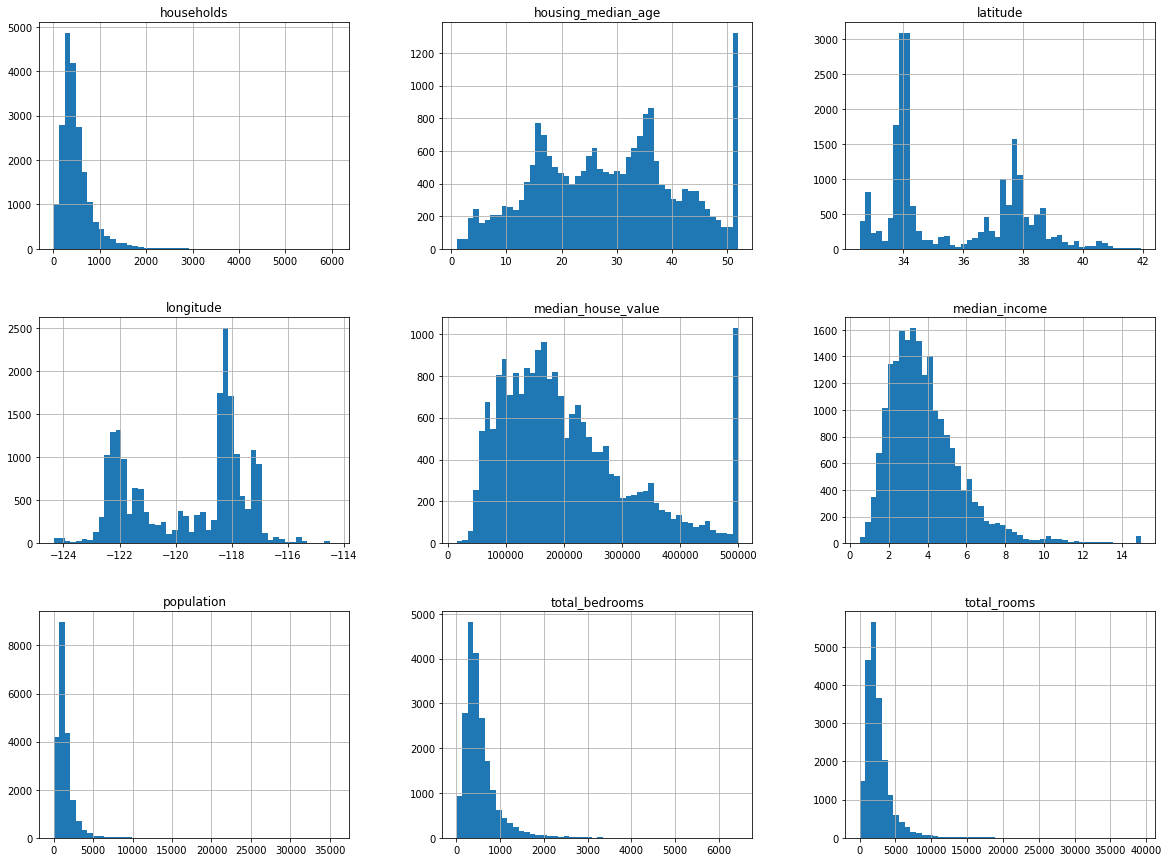

In [22]:
%matplotlib notebook #wrong
%matplotlib inline #needed when using colab notebook
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

Creating a test set is simple, pick some instances randomly, typically 20%
of the dataset and set them aside.
Scikit-learn provides a few functions to split datasets into multiple subsets. 
The random state parameter allows you to set the random generator seed.

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(len(train_set))
print(len(test_set))

16512
4128


The pd.cut() function can be used to create an income category (income_cat) attribute, 
in our case with 5 categories.

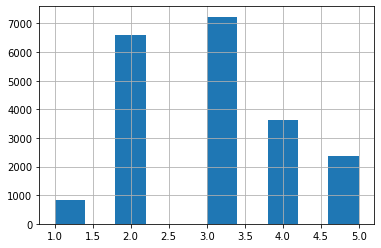

In [23]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist()

Stratified sampling based on the income category (income_cat).

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

print(split)


for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
# print(strat_train_set)

# print(strat_test_set)

# print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)


Now you should remove the income_cat attribute so that the data is 
back to its original state.

In [24]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

print(strat_train_set)

print(strat_test_set)

       longitude  latitude  ...  median_house_value  ocean_proximity
17606    -121.89     37.29  ...            286600.0        <1H OCEAN
18632    -121.93     37.05  ...            340600.0        <1H OCEAN
14650    -117.20     32.77  ...            196900.0       NEAR OCEAN
3230     -119.61     36.31  ...             46300.0           INLAND
3555     -118.59     34.23  ...            254500.0        <1H OCEAN
...          ...       ...  ...                 ...              ...
6563     -118.13     34.20  ...            240200.0           INLAND
12053    -117.56     33.88  ...            113000.0           INLAND
13908    -116.40     34.09  ...             97800.0           INLAND
11159    -118.01     33.82  ...            225900.0        <1H OCEAN
15775    -122.45     37.77  ...            500001.0         NEAR BAY

[16512 rows x 10 columns]
       longitude  latitude  ...  median_house_value  ocean_proximity
5241     -118.39     34.12  ...            500001.0        <1H OCEAN
10970  

Creating a copy to play around with ...

In [0]:
housing = strat_train_set.copy()

Creating a scatterplot of all districts to visualize the data.

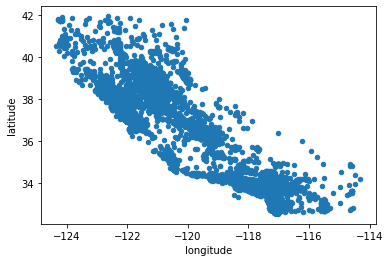

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude")

Highlighting high-density areas using alpha to adjust transparency.

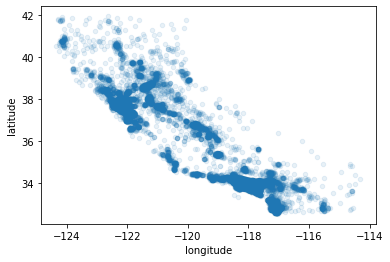

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

The radius of each circle represents the district’s population (option s), 
and the color represents the price (option c).

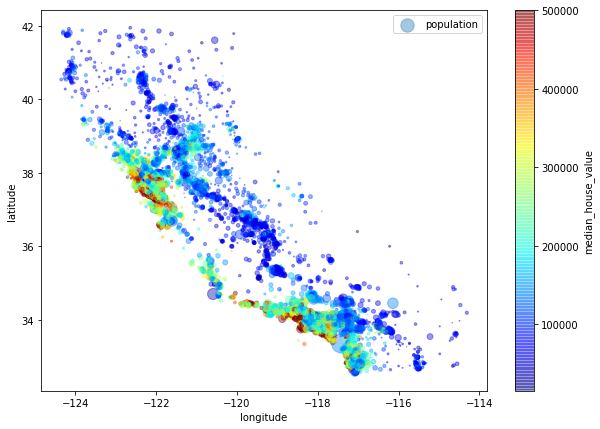

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

We can compute standard correlation coefficients (ranging from -1 to 1)
for every pair of attributes. Let's look at median_house_value.

In [0]:
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Correlations with scatter matrix.

<IPython.core.display.Javascript object>


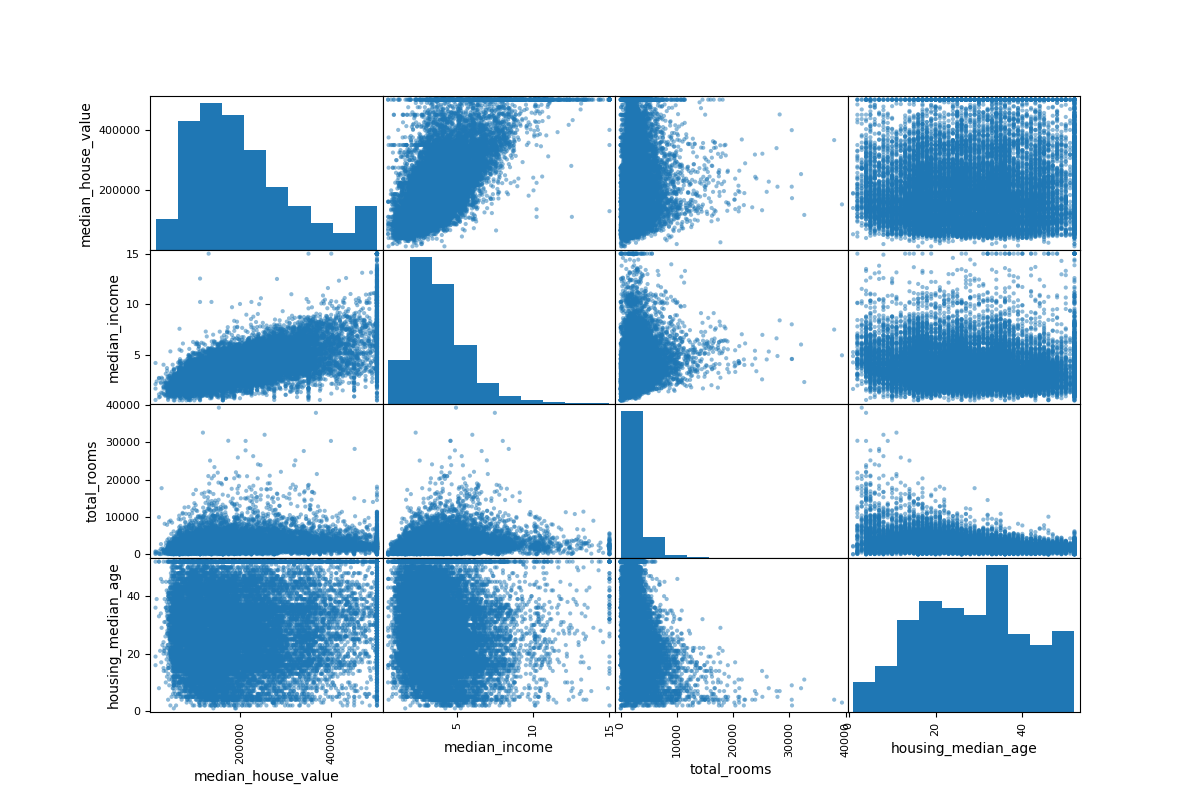

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000172C07EDF88>,
      dtype=object)

In [0]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",              
              "housing_median_age"] 
scatter_matrix(housing[attributes], figsize=(12, 8))

Let’s zoom in the correlation between median_income and median_house_value. Price cap at $500000 is clearly visible.

<IPython.core.display.Javascript object>


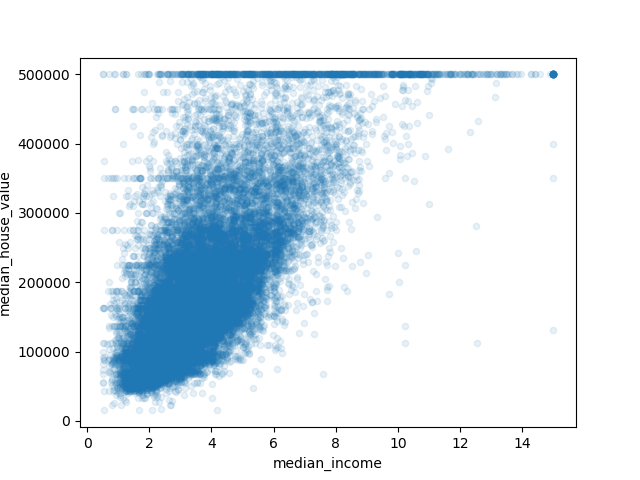

In [0]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

Experimenting with attribute combinations.

In [0]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] 
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] 
housing["population_per_household"]=housing["population"]/housing["households"] 
corr_matrix = housing.corr() 

corr_matrix["median_house_value"].sort_values(ascending=False) 

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

Let’s create a clean train set and separate the predicators
and the labels. We drop labels for training set.

In [0]:
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()

Most ML algorithm cannot work with missing values.
Remember: the total_bedrooms attribute had some missing values. 
We have three options:
   - get rid of the corresponding districts
   - get rid of the whole attribute
   - set the values to some value (zero, the mean, the median, etc.)
You can use the dropna(), drop() and fillna() methods to achieve this.

In [0]:
housing.dropna(subset=["total_bedrooms"])             # option 1
housing.drop("total_bedrooms", axis=1)                # option 2
median = housing["total_bedrooms"].median()           # option 3
housing["total_bedrooms"].fillna(median, inplace=True) 

Scikit-learn provides a class (SimpleImputer) to take care of missing values.
Create a SimpleImputer instance and specifying a strategy.
The median can only be computed on numerical data, therefore we create a copy (housing_num) without ocean_proximity.

In [0]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") 
housing_num = housing.drop("ocean_proximity", axis=1) 

imputer.fit(housing_num)

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

It is safer to apply the imputer to all numerical attributes.

In [0]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

The trained imputer can now be used to transform the training set by replacing missing values by the learned medians: 

In [0]:
X = imputer.transform(housing_num) 

The above transformation results in a plain NumPy array that we can put back 
into a Pandas DataFrame: 

In [0]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2.0
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,5.0
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2.0
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3.0
...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,4.0
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,2.0
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,3.0
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,3.0


As we have seen ocean_proximity is a categorial attribute.

In [0]:
housing_cat = housing[["ocean_proximity"]]

housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


Most ML algorithms prefer to work with numbers over categories.
Scikit-learn provides a OneHotEncoder class to convert categorical
values into one-hot vectors.

In [0]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

You can convert the dense matrix to a NumPy array, if you really want.

In [0]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

You can get the list of categories using the encoders categories_
instance variable.

In [0]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Often you have to write your own transformers for cleaning up the data or combining specific attributes. 
Scikit-learn provides support for these tasks.
What follows is a small transformer class that adds the combined 
specific attributes (such as bedroom_per_room).

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self                                   # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

print(housing_extra_attribs)


[[-121.89 37.29 38.0 ... 2 4.625368731563422 2.094395280235988]
 [-121.93 37.05 14.0 ... 5 6.008849557522124 2.7079646017699117]
 [-117.2 32.77 31.0 ... 2 4.225108225108225 2.0259740259740258]
 ...
 [-116.4 34.09 9.0 ... 3 6.34640522875817 2.742483660130719]
 [-118.01 33.82 31.0 ... 3 5.50561797752809 3.808988764044944]
 [-122.45 37.77 52.0 ... 3 4.843505477308295 1.9859154929577465]]


Scikit-learn provides the class (Pipeline) to help with sequences of transformations. 
Below is a small pipeline for the numerical attributes:

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

So far, the categorical columns and the numerical columns have been handled separately. 
It is more convenient to have a single transformer able to handle all
columns and apply the appropriate transformations to each column. 

In [0]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

Train a Linear Regression Model

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# Let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

print("Labels:", list(some_labels))


Predictions: [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


The result is not good; the first prediction is off by 40%. 
Let's measure this regression model's RMSE on the whole
training set using Scikit-learn's means_squared_error function.

In [0]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_rmse

68628.19819848923

Most districts’ median_housing_values range between \\$120,000 and \\$265,000.
A typical prediction error of \\$68,628 is not very satisfying. 
This is an example of a model underfitting the training data.

Let's train a DecisionTree model.

In [0]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

# Now that the model is trained, let's evaluate it on the training set:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.0

One way to evaluate the Decision Tree model would be to use the
train_test_split function to split the training set into a smaller
training set and a validation set, then train your models against the
smaller training set and evaluate them against the validation set.

An alternative is to use Scikit-Learn's K-folds cross-validation feature.

The following code randomly splits the training set into 10 distinct
subsets called folds.
Afterwards it trains and evaluates the Decision Tree model 10 times,
It picks a different fold for evaluation every time and trains on the 
other 9 folds. 
The result is an array containing the 10 evaluation scores.  

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


In [0]:
Let’s compute the same scores for the Linear Regression model:

In [0]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798349


Random Forests work by training many Decision Trees on random subsets
of the features, then averaging out their predictions. 
Building a model on top of many other models is called Ensemble Learning.

In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_rmse

18603.515021376355

In [0]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)


Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


Let's assume that you have a shortlist of promising models. 
You now need to fine-tune them. 
One way to do this is to fiddle with the hyperparameters manually.
Instead you can use Scikit-Learn's GridSearchCV to search for you. 
You only have to specify which hyperparameters and which values you
want to try out. 
Randomized search and ensemble methods are other approaches to do this.

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

grid_search.best_params_

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.25345942335 {'max_features': 8, 'n_estimators': 30}
62895.088889905004 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.14484390074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.399594730654 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52725.01091081235 {'bootstrap': False, 'max_features': 3, 'n_estimators'

We obtain the best solution by setting the max_features hyperparameter to
8, and the n_estimators hyperparameter to 30. 
The RMSE score for this combination is 49,682.
This is slightly better than the score we got earlier using the default
hyperparameter values (which was 50,182). 


In [0]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1) 
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions) 
final_rmse = np.sqrt(final_mse)   

final_rmse

47730.22690385927